In [1]:
import numpy as np
import torch 
import os
import pandas as pd
import ast

In [2]:
root_dir = "/scratch/qingqu_root/qingqu1/xlxiao/DL/data/SVHNformat1/"
len(os.listdir(root_dir + "train"))

33402

In [24]:
label_data = pd.read_csv(root_dir + "labels_train.csv")
print(label_data.head())
x = label_data.unique_label.values

    name unique_label
0  1.png       [1, 9]
1  2.png       [2, 3]
2  3.png       [2, 5]
3  4.png       [3, 9]
4  5.png       [1, 3]


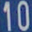

In [45]:
from PIL import Image
# 9, 63, 136
path = root_dir + "train/137.png" 
Image.open(path).convert("RGB")

In [4]:
"""
Selet samples with balanced mul-1 samples, and rule out samples with mul>3
"""
# Train
label_data = pd.read_csv(root_dir + "labels_train.csv")
x = label_data.unique_label.values

save_idx_list = []
count = np.zeros(9)
for i in range(len(x)):
    cur_label = ast.literal_eval(x[i])
    if 0 not in cur_label: # Make sure 0 is not in the label
        if len(cur_label) == 1: # Make sure mul-1 has <= 543 samples per class
            single_label = cur_label[0] - 1
            if count[single_label] + 1 <= 543:
                count[single_label] += 1
                save_idx_list.append(i)
        elif len(cur_label) < 4: # Throw out >mul-3 samples
            save_idx_list.append(i)

# Test
label_data = pd.read_csv(root_dir + "labels_test.csv")
x = label_data.unique_label.values

save_idx_list_test = []
count = np.zeros(9)
for i in range(len(x)):
    cur_label = ast.literal_eval(x[i])
    if 0 not in cur_label: # Make sure 0 is not in the label
        if len(cur_label) == 1: # Make sure mul-1 has <= 543 samples per class
            single_label = cur_label[0] - 1
            if count[single_label] + 1 <= 543:
                count[single_label] += 1
                save_idx_list_test.append(i)
        elif len(cur_label) < 4: # Throw out >mul-3 samples
            save_idx_list_test.append(i)

In [5]:
len(save_idx_list_test)

11273

In [ ]:
label_data = pd.read_csv(root_dir + "labels_train.csv")
x = label_data.unique_label.values
check_count = np.zeros(10)
for idx in save_idx_list:
    cur_label = ast.literal_eval(x[idx])
    if len(cur_label) == 1:
        check_count[cur_label[0]] += 1
print(check_count)

[  0. 543. 543. 543. 543. 543. 543. 543. 543. 543.]


In [ ]:
"""Save the processed indices"""
import pickle
to_save = {
            "indices_train": save_idx_list,
            "indices_test": save_idx_list_test
            }
    
with open(root_dir + "no_zero_indices_mul1_balance.pkl", 'wb') as f: 
    pickle.dump(to_save, f)

In [ ]:
"""Plotting distribution of multiplicity"""
    
with open(root_dir + "no_zero_indices_mul1_balance.pkl", 'rb') as f: 
    all_indices = pickle.load(f)['indices_train']

In [ ]:
# Train
label_data = pd.read_csv(root_dir + "labels_train.csv")
x = label_data.unique_label.values

save_idx_list = []
heatmap = np.zeros([9,9])
count = np.zeros(9)
for i in all_indices:
    cur_label = ast.literal_eval(x[i])
    if len(cur_label) == 2:
        left = cur_label[0]-1
        right = cur_label[1]-1
        heatmap[left,right] += 1
        # heatmap[right,left] += 1
    elif len(cur_label) == 1:
        center = cur_label[0]-1
        heatmap[center, center] += 1

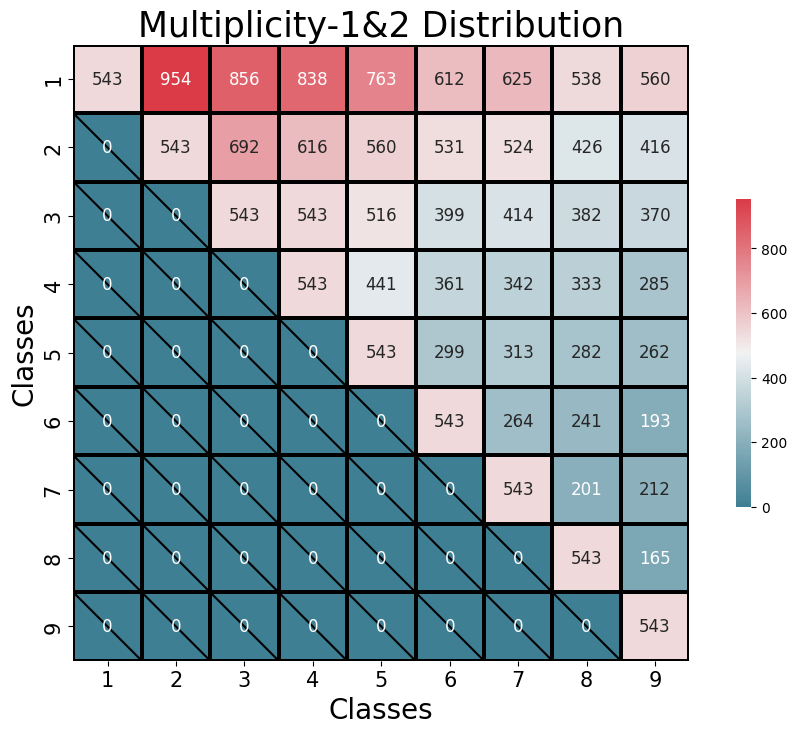

In [ ]:
heatm = heatmap

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(heatm, cmap=cmap,annot=True, fmt=".0f",
            square=True, linecolor='black',
            linewidths=1.5, cbar_kws={"shrink": .5}, ax=ax, 
            annot_kws={"fontsize":12}) #, xticklabels=5, yticklabels=5


for i in range(1,9):
    plt.plot(np.arange(0,10), np.arange(i,i+10), color="black")

ax.set_xticks(np.arange(0,9)+0.5) 
ax.set_xticklabels(np.arange(1,10).astype(int), fontsize=15)

ax.set_yticks(np.arange(0,9)+0.5) 
ax.set_yticklabels(np.arange(1,10).astype(int), fontsize=15)

ax.set_xlabel("Classes", fontsize = 20)
ax.set_ylabel("Classes", fontsize = 20)
ax.set_title("Multiplicity-1&2 Distribution", fontsize=25)
f.savefig("figs/svhn_mul_2_dist.png", bbox_inches='tight')